<a href="https://colab.research.google.com/github/jenny102292/data-science-bootcamp/blob/main/07_uczenie_glebokie/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy koleny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składających się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28x28 powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trourser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat|
| 5 | Sandal|
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>

### Spis treści:
1. [Import bibliotek](#a1)
2. [Załadowanie danych i wstępna eksploracja](#a2)
3. [Budowa modelu](#a3)
4. [Ocena modelu](#a4)
5. [Predykcja na podstawie modelu](#a5)
6. [Eksploracja predykcji](#a6)
7. [Błędnie sklasyfikowane obrazy](#a7)
8. [Kilka możliwości poprawy modeli](#a8)



### <a name='a1'></a> Import bibliotek

In [22]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.18.0'

### <a name='a2'></a> Załadowanie danych i wstępna eksploracja

In [23]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243, 202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197, 209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119, 167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55, 236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,  92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237, 226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,  77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228, 207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244, 159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217, 226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238, 215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200, 159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232, 246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,  80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228, 225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217, 241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224, 229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198, 213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221, 230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219, 221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205, 206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211, 210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177, 210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189, 188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216, 170,   0],
       [  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244, 221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40,  61,  44,  72,  41,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [25]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

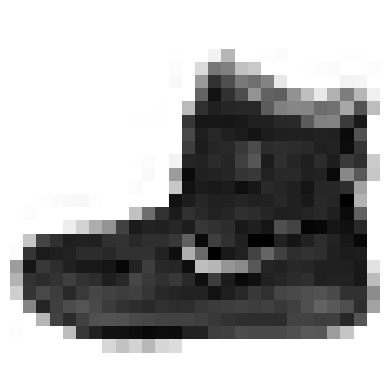

In [26]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

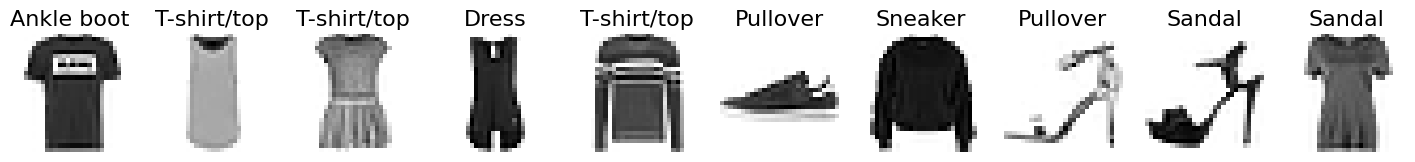

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [28]:
X_train = X_train / 255.
X_test = X_test / 255.

In [29]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

### <a name='a3'></a> Budowa modelu

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**epochs** - ile razy zestaw treningowy zostanie przetworzony przez model. Przy każdej iteracji próbuje dopasować wagi, aby funkcja celu została zminimalizowana.

**batch_size** - liczba przykładów treningowych po której następuje aktualizacja wag

**validation_split** - procent danych użytych do walidacji

In [31]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7680 - loss: 0.6756 - val_accuracy: 0.8446 - val_loss: 0.4410
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8558 - loss: 0.3975 - val_accuracy: 0.8598 - val_loss: 0.3947
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8729 - loss: 0.3510 - val_accuracy: 0.8772 - val_loss: 0.3591
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8830 - loss: 0.3270 - val_accuracy: 0.8768 - val_loss: 0.3477
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8873 - loss: 0.3164 - val_accuracy: 0.8803 - val_loss: 0.3475
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8939 - loss: 0.3028 - val_accuracy: 0.8783 - val_loss: 0.3735
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8961 - loss: 0.2902 - val_accuracy: 0.8727 - val_loss: 0.3754
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8993 - loss: 0.2786 - 

In [32]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.815125,0.525731,0.844583,0.441034,0
1,0.860396,0.387246,0.859833,0.394672,1
2,0.874021,0.351098,0.877167,0.359121,2
3,0.881708,0.328664,0.876833,0.347685,3
4,0.887062,0.315716,0.880333,0.347539,4
5,0.891750,0.302001,0.878333,0.373543,5
6,0.895875,0.292322,0.872667,0.375383,6
7,0.898896,0.282610,0.869167,0.388505,7
8,0.901521,0.278709,0.883583,0.363612,8
9,0.905583,0.268785,0.876667,0.369300,9


### <a name='a4'></a> Ocena modelu

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8689000010490417


### <a name='a5'></a> Predykcja na podstawie modelu

- **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
- **model.predict_classes()** - pozwala zwrócić odpowiednio przewidziane klasy
- **model.predict_proba(), model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy

In [35]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.000000019617, 0.000000000052, 0.000000014488, ..., 0.012361747   , 0.000000527426, 0.98616713    ],
       [0.000019469488, 0.000000000021, 0.99719864    , ..., 0.000000000244, 0.00000000993 , 0.            ],
       [0.000000000226, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000002460448, 0.            , 0.000000386713, ..., 0.000000076982, 0.99999577    , 0.0000000019  ],
       [0.000000000037, 0.9999996     , 0.000000000001, ..., 0.000000006386, 0.000000000011, 0.000000000013],
       [0.000004093798, 0.000002663737, 0.000000761701, ..., 0.0026528277  , 0.00005676858 , 0.00000105336 ]], dtype=float32)

In [36]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000001,0.001469,0.000000,0.012362,0.000001,0.986167
1,0.000019,0.000000,0.997199,0.000000,0.002577,0.000000,0.000204,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.999999,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.159041,0.000000,0.001336,0.000018,0.000043,0.000000,0.839545,0.000000,0.000018,0.000000


In [39]:
#predictions_cls = model.predict_classes(X_test)
#predictions_cls
predictions_cls = np.argmax(model.predict(X_test), axis=-1)
predictions_cls

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

### <a name='a6'></a> Eksploracja predykcji

In [44]:
#@title Wybierz indeks zdjęcia:
idx = 469 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a7'></a> Błędnie sklasyfikowane obrazy

In [47]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
  if predictions_cls[idx] != y_test[idx]:
    misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
  index_mapper[idx] = idx_real

idx = 922 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f'Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                  f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))

fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a8'></a> Kilka możliwości poprawy modeli

- zwiększenie liczby epok
- zwiększenie/zmniejszenie parametrów uczenia, strojenie hiperparametrów
- zwiększenie/zmniejszenie liczby neuronów wewnątrz warstw ukrytych
- zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
- zwiększenie/zmniejszenie liczby warstw ukrytych
- zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout